In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from music21 import *

import seaborn as sns
sys.path.append('.')
from latexify import *

In [26]:
def plot_piano_roll(ax1, s, showRomanAnalysis=False):
    g = graph.PlotHorizontalBarPitchSpaceOffset(s)
    data, xTicks, _ = g._extractData()

    yPos = 0
    xPoints = [] # store all to find min/max
    yTicks = [] # a list of label, value pairs

    #colors = sns.color_palette("muted")
    colors = sns.color_palette("husl", 12)
    axRoman = ax1.twiny()

    keys = []
    i = 0
    for i, (key, points) in enumerate(data):
        keys.append(key)
        if len(points) > 0:
            yrange = (yPos + 1, 1)
            axRoman.broken_barh(points,
                            yrange,
                            facecolor=colors[i%len(colors)],
                            alpha=0.8)
            for xStart, xLen in points:
                xEnd = xStart + xLen
                for x in [xStart, xEnd]:
                    if x not in xPoints:
                        xPoints.append(x)
        yTicks.append([yPos + 1 * .5, key])
        yPos += 1
        i += 1

    xMin = min(xPoints)
    xMax = max(xPoints) 
    ax1.set_ylim(0, len(keys) * 1)
    ax1.set_xlim(xMin, xMax)
    axRoman.set_xlim(xMin, xMax)
    ax1.set_yticks(map(lambda x: x+1, zip(*yTicks)[0]))
    ax1.set_yticklabels(zip(*yTicks)[1])
    ax1.set_xticks(zip(*xTicks)[0])
    ax1.set_xticklabels(zip(*xTicks)[1])
    ax1.set_xlabel('Measure number')
    ax1.set_ylabel('Pitch')
    
    if showRomanAnalysis:
        ax1.set_title('')
        axRoman.set_xticks(romanTicks)
        axRoman.set_xticklabels(map(escape_latex, romanLabels))
        axRoman.set_xlabel('music21 Roman numeral analysis')
        axRoman.grid(zorder=0)
    
    return ax1, axRoman

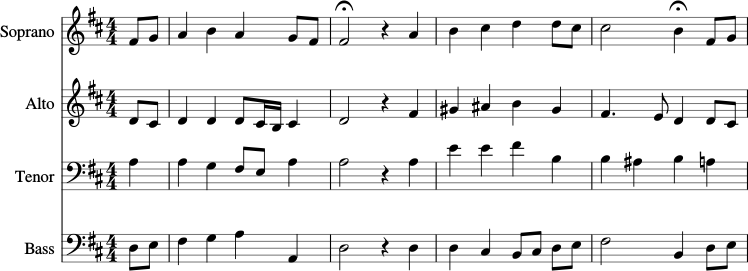

In [24]:
s = corpus.parse("bach","bwv133.6").measures(0,4)
latexify(columns=2)
s.write('musicxml.pdf', 'bwv133-6-eg-score')
s.show()

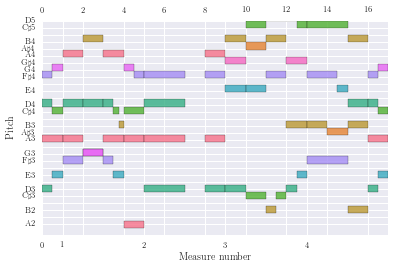

In [27]:
latexify(columns=2)
fig, ax = plt.subplots(1,1)
plot_piano_roll(ax, s, showRomanAnalysis=False)
fig.savefig('bwv133-6-eg-piano.pgf', bbox_inches='tight', dpi=300)
fig.show()